# <i class="fas fa-circle exercise"></i> Noise removal

In this exercise you work on reducing / removing noise from images.


In [1]:
# importing libraries
from functools import partial
import random
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
import skimage
from scipy.ndimage import convolve
import scipy.ndimage as sp

First we provide some function needed to do the exercise that you do not have to code youself. 

In [2]:
def show_images(**images):
    """Show multiple images using matplotlib."""
    # When a double-starred parameter is declared such as $**images$, then all
    # the keyword arguments from that point till the end are collected as a
    # dictionary called $'images'$.

    # Create a new matplotlib window.
    plt.figure(figsize=(10,10))

    # Set the default colormap to gray and apply to current image if any.
    plt.gray()

    # Enumarate the ID, window name and images passed as parameter.
    for (pos, (name, image)) in enumerate(images.items()):
        # Show the image in a new subplot.
        plt.subplot(2, len(images) // 2, pos + 1)
        plt.title(name)
        plt.imshow(image)

    # Show the images.
    plt.show()
    
def rgb2gray(rgb):
    ### convert an image to gray scale

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

def add_noise(img):
 
    # Getting the dimensions of the image
    row , col = img.shape
     
    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to white
        img[y_coord][x_coord] = 1
         
    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to black
        img[y_coord][x_coord] = 0
         
    return img

In [3]:
# <!--------------------------------------------------------------------------->
# <!--                              INPUT IMAGE                              -->
# <!--------------------------------------------------------------------------->

# Input image filename.
filename = "./inputs/baboon.png"

# Loads an image from a file passed as argument.
image =plt.imread(filename)[:,:,:3]
gray = rgb2gray(image.copy())


In [4]:
##Adding 3 different types of noise

mean = 0.0
var = 0.01
sigma = var ** 0.5
low = 0.0
high = 1.0

gaussian = np.random.normal(mean, sigma, (gray.shape[0],gray.shape[1])) 
uniform = np.random.uniform(low,high,(gray.shape[0],gray.shape[1]))
gaus_noise = gray.copy() + gaussian
uni_noise = gray.copy() + uniform
sp_noise = add_noise(gray.copy())

2.  **Show noisy images:** The function `show_images()` displays the noisy images, as shown in
    {numref}`noisy`. 

    ```{figure} ../img/noised.png
    ---
    name: noisy
    ---
    Example of images with simulated random noise.
    ```

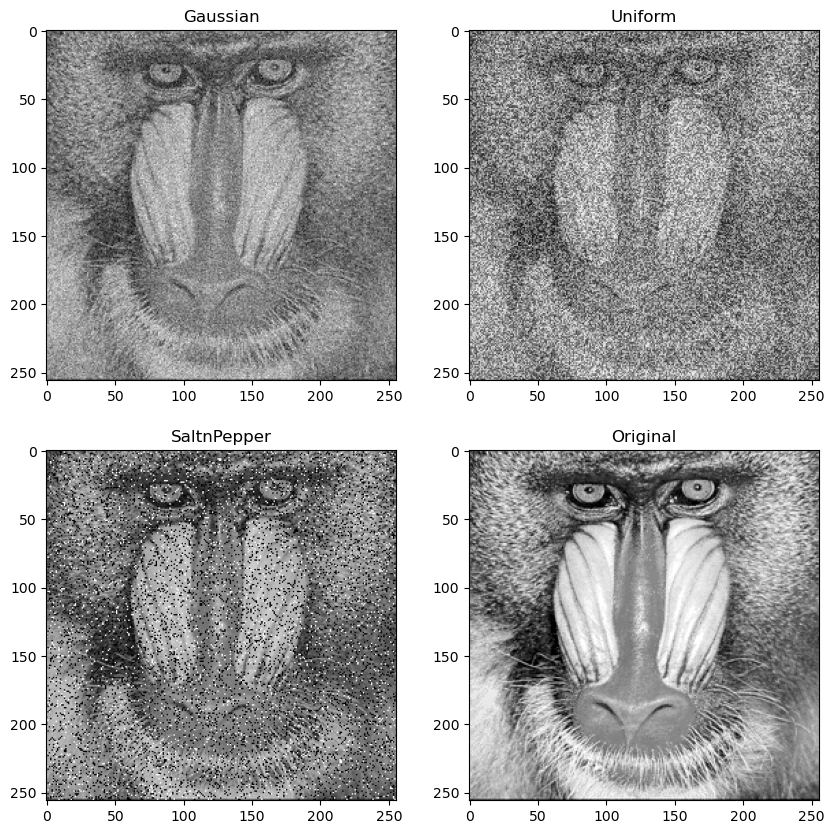

In [5]:
noised = add_noise(gray.copy())

show_images(Gaussian = gaus_noise,Uniform = uni_noise,SaltnPepper=sp_noise,Original=gray)

2.  Study creation of the noisy images `salt_and_pepper_noise`, `gaussian_noise` and `uniform_nois` and make sure
    you understand their difference.

    a) The function `add_noise` adds a random number of black and white pixels to the image (called salt and pepper noise)



3.  **Reduce image noise:** For each type of noisy image (Gaussian,
    uniform and salt-and-pepper) determine which $N \times N$ filter
    best removes the noise ($N$ is a user defined parameter). Implement
    the best performing technique in the respective functions:

    a) `salt_and_pepper_filter()` to remove salt-and-peper noise from the input image.

    b) `gaussian_filter()` to remove Gaussian noise from the input image.

    c) `uniform_filter()` to remove uniform noise from the input image.

    all filters needed can be found on [scipy.ndimage](https://docs.scipy.org/doc/scipy/reference/ndimage.html) but you are welcome to code them from scratch as well. 

4. What is the cost of using filters? 

In [16]:

# <!--------------------------------------------------------------------------->
# <!--                                FILTERS                                -->
# <!--------------------------------------------------------------------------->


def salt_and_pepper_filtering(image, n=3):
    """
    This function removes salt-and-pepper noise from the input image.
    """
    # You have to filter this variable.
    filtered = image.copy()
    h, w = filtered.shape

    # implemented median filter here from scipy.ndimage
    filtered = sp.median_filter(filtered, n+1)

    return filtered


def gaussian_filtering(image,sigma, n=2):
    """
    This function removes Gaussian noise from the input image.
    """
    # You have to filter this variable.
    filtered = image.copy()
    h, w = filtered.shape

    # implement gaussian filter here from scipy.ndimage
    filtered = sp.gaussian_filter(filtered, sigma, n)

    return filtered


def uniform_filtering(image, n=8):
    """
    This function removes uniform noise from the input image.
    """
    # You have to filter this variable.
    filtered = image.copy()
    h, w = filtered.shape

    # implemented uniform filter here from scipy.ndimage
    filtered = sp.uniform_filter(filtered, n/2)

    return filtered



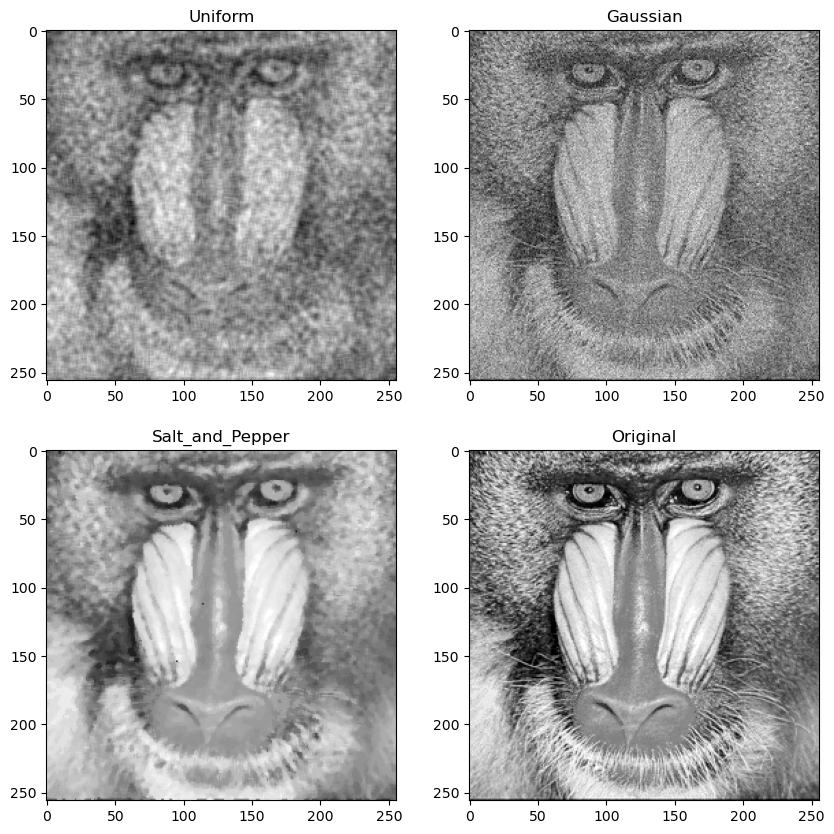

In [17]:


# <!--------------------------------------------------------------------------->
# <!--                       FILTERING THE NOISED IMAGE                      -->
# <!--------------------------------------------------------------------------->

################# RUN when you have implemented the filters.

# Filter the salt and pepper noise.
saltAndPepperFiltered = salt_and_pepper_filtering(sp_noise)

# Filter the Gaussian noise.
gaussianFiltered = gaussian_filtering(gaus_noise,sigma=0)

# Filter the uniform noise.
uniformFiltered = uniform_filtering(uni_noise)

# Show the original image and the noised images.
show_images(
    Uniform=uniformFiltered,
    Gaussian=gaussianFiltered,
    Salt_and_Pepper=saltAndPepperFiltered,
    Original=gray,
)
